In [53]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

# custom functions
from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.valuations_visual import PlayerValsPlots
from explore.src.data.valuations_dfs import PlayerValues, PlayerValData
from explore.src.preprocess.clean_valuations import CleanPlayerVals



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = gcp.read_df_from_bucket(bucket_name='transfermarkt_db', blob_name='bundesliga_player_valuations.csv')

[02/25/24 14:13:27] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=727759;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=181851;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=639413;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=165681;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team
0,17259,manuel-neuer,Manuel Neuer,1,Goalkeeper,32,Germany,Bayern Munich,193.0,right,"Jul 1, 2011",FC Schalke 04,30.0,NaN,35.00,2017,bundesliga,fc-bayern-munchen
1,40680,sven-ulreich,Sven Ulreich,26,Goalkeeper,29,Germany,Bayern Munich,192.0,right,"Jul 1, 2021",Hamburger SV,0.0,NaN,6.00,2017,bundesliga,fc-bayern-munchen
2,336307,christian-fruchtl,Christian Früchtl,36,Goalkeeper,18,Germany,Austria Vienna,193.0,left,"Jul 1, 2017",FC Bayern Munich U19,NaN,NaN,0.15,2017,bundesliga,fc-bayern-munchen
3,196427,leo-weinkauf,Leo Weinkauf,0,Goalkeeper,21,Germany,Hannover 96,196.0,right,-,NaN,0.0,NaN,0.10,2017,bundesliga,fc-bayern-munchen
4,80,tom-starke,Tom Starke,22,Goalkeeper,37,Germany,Retired,194.0,right,"Sep 21, 2017",NaN,0.0,NaN,0.10,2017,bundesliga,fc-bayern-munchen


In [4]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
tm_id,int64,0,0.00,1658,26.0,997861.0,232458.5,264982.26,192801.23,82,1.90
squad_num,int64,0,0.00,51,0.0,53.0,17.0,17.44,13.23,0,0.00
age,int64,0,0.00,26,16.0,41.0,25.0,25.08,4.56,6,0.14
height,float64,36,0.84,40,0.0,205.0,185.0,183.94,8.53,14,0.33
signing_fee_euro_mill,float64,1036,24.06,161,0.0,95.0,1.8,4.95,8.07,282,6.55
market_value_euro_mill,float64,91,2.11,143,0.1,150.0,2.8,7.48,12.79,430,9.99
season,int64,0,0.00,7,2017.0,2023.0,2020.0,2019.95,1.95,0,0.00


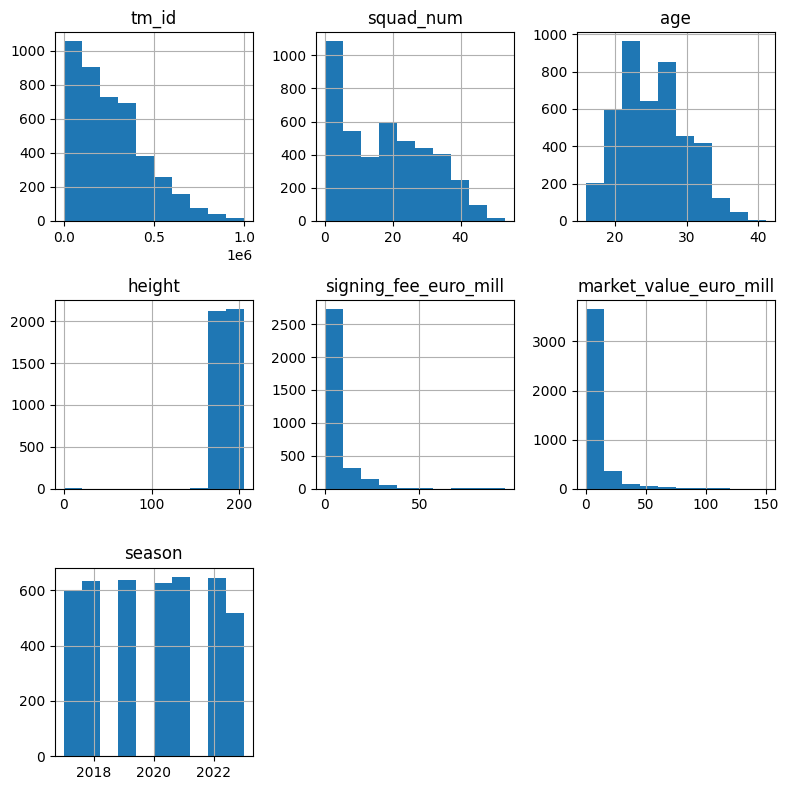

In [5]:
df.hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

## Clean data

In [6]:
df = CleanPlayerVals(df).pipeline()
df.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team,signed_year
0,17259,manuel-neuer,Manuel Neuer,1,Goalkeeper,32,Germany,Bayern Munich,193.0,right,"Jul 1, 2011",FC Schalke 04,30.0,NaN,35.00,2017,bundesliga,fc-bayern-munchen,2011
1,40680,sven-ulreich,Sven Ulreich,26,Goalkeeper,29,Germany,Bayern Munich,192.0,right,"Jul 1, 2021",Hamburger SV,0.0,NaN,6.00,2017,bundesliga,fc-bayern-munchen,2021
2,336307,christian-fruchtl,Christian Früchtl,36,Goalkeeper,18,Germany,Austria Vienna,193.0,left,"Jul 1, 2017",FC Bayern Munich U19,NaN,NaN,0.15,2017,bundesliga,fc-bayern-munchen,2017
3,196427,leo-weinkauf,Leo Weinkauf,0,Goalkeeper,21,Germany,Hannover 96,196.0,right,-,NaN,0.0,NaN,0.10,2017,bundesliga,fc-bayern-munchen,<NA>
4,80,tom-starke,Tom Starke,22,Goalkeeper,37,Germany,Retired,194.0,right,"Sep 21, 2017",NaN,0.0,NaN,0.10,2017,bundesliga,fc-bayern-munchen,2017


## Position Analysis

In [7]:
plots = PlayerValsPlots(df)

In [8]:
plots.valuation_plot(column='position')

## Country Analysis

In [9]:
plots.valuation_plot(column='country')

In [10]:
plots.var_totals_plot(column='country')

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [11]:
df['country'].value_counts().index[:10]

Index(['Germany', 'Austria', 'France', 'Netherlands', 'Switzerland', 'Denmark',
       'United States', 'Brazil', 'Croatia', 'Belgium'],
      dtype='object', name='country')

In [12]:
PlayerValues(df, column='country').pipeline()

,country,signing_fee_euro_mill,market_value_euro_mill,diff_value_paid,color,diff_value_paid_perc
0,North Macedonia,24.00,5.835000,-18.165000,red,-75.69
1,Burkina Faso,20.20,32.600000,12.400000,blue,61.39
2,Slovenia,17.50,12.950000,-4.550000,red,-26.00
3,Canada,14.00,47.878571,33.878571,blue,241.99
4,Jamaica,13.76,31.500000,17.740000,blue,128.92
...,...,...,...,...,...,...
89,Russia,0.00,1.518750,1.518750,blue,inf
90,Jordan,0.00,NaN,NaN,red,NaN
91,Azerbaijan,NaN,0.200000,NaN,red,NaN
92,Bulgaria,NaN,0.920000,NaN,red,NaN


## Team Analysis

In [13]:
plots.valuation_plot(column='team')

## Signing Value Analysis

In [14]:
plots.plot_diff_val_paid(column='team')

In [15]:
value_signings_df = PlayerValData().value_signings_df(df)
value_signings_df.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team,signed_year,diff_sign_fee_mv
2499,344695,dayot-upamecano,Dayot Upamecano,2,Centre-Back,23,France,Bayern Munich,186.0,right,"Jul 5, 2021",RB Leipzig,42.5,NaN,40.0,2021,bundesliga,fc-bayern-munchen,2021,-2.5
2581,475959,josko-gvardiol,Josko Gvardiol,32,Centre-Back,20,Croatia,Manchester City,185.0,left,"Jul 1, 2021",GNK Dinamo Zagreb,36.8,NaN,35.0,2021,bundesliga,rasenballsport-leipzig,2021,-1.8
2593,451276,dominik-szoboszlai,Dominik Szoboszlai,17,Central-Midfield,21,Hungary,Liverpool FC,187.0,right,"Jan 1, 2021",Red Bull Salzburg,36.0,NaN,28.0,2021,bundesliga,rasenballsport-leipzig,2021,-8.0
2571,326029,donyell-malen,Donyell Malen,21,Right-Winger,23,Netherlands,Borussia Dortmund,176.0,right,"Jul 27, 2021",PSV Eindhoven,30.0,NaN,27.0,2021,bundesliga,borussia-dortmund,2021,-3.0
2618,644771,odilon-kossounou,Odilon Kossounou,6,Centre-Back,21,Cote d'Ivoire,Bayer 04 Leverkusen,191.0,right,"Jul 22, 2021",Club Brugge KV,23.0,NaN,20.0,2021,bundesliga,bayer-04-leverkusen,2021,-3.0


In [16]:
value_signings_df.loc[:, "diff_sign_fee_mv"] = (
    value_signings_df["market_value_euro_mill"]
    - value_signings_df["signing_fee_euro_mill"]
)

In [17]:
successful_signings = (
    value_signings_df[value_signings_df["diff_sign_fee_mv"] > 0]
    .sort_values("diff_sign_fee_mv", ascending=False)
    .reset_index(drop=True)
)

In [18]:
successful_signings.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team,signed_year,diff_sign_fee_mv
0,418560,erling-haaland,Erling Haaland,9,Centre-Forward,20,Norway,Manchester City,195.0,left,"Jan 1, 2020",Red Bull Salzburg,20.0,NaN,130.0,2020,bundesliga,borussia-dortmund,2020,110.0
1,487969,randal-kolo-muani,Randal Kolo Muani,9,Centre-Forward,24,France,Paris Saint-Germain,187.0,right,"Jul 1, 2022",FC Nantes,0.0,NaN,80.0,2022,bundesliga,eintracht-frankfurt,2022,80.0
2,88103,james-rodriguez,James Rodríguez,11,Attacking-Midfield,26,Colombia,São Paulo Futebol Clube,181.0,left,"Jul 12, 2017",Real Madrid,13.0,NaN,70.0,2017,bundesliga,fc-bayern-munchen,2017,57.0
3,153084,leon-goretzka,Leon Goretzka,18,Central-Midfield,24,Germany,Bayern Munich,189.0,right,"Jul 1, 2018",FC Schalke 04,0.0,NaN,50.0,2018,bundesliga,fc-bayern-munchen,2018,50.0
4,80444,philippe-coutinho,Philippe Coutinho,10,Attacking-Midfield,28,Brazil,Al-Duhail SC,172.0,right,"Aug 19, 2019",FC Barcelona,8.5,NaN,56.0,2019,bundesliga,fc-bayern-munchen,2019,47.5


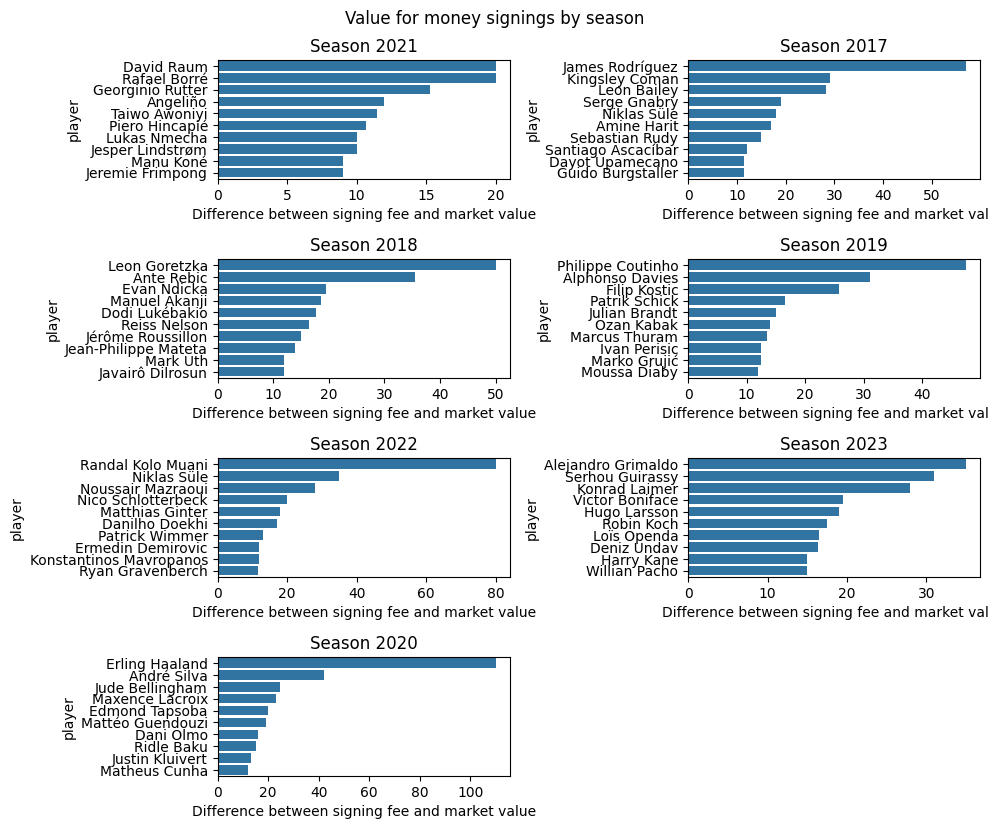

In [20]:
plots.plot_value_signings()

In [52]:
# for each season, get the average difference between signing fee and market value
# for the players that were signed by team
dfs = []
for year in df["season"].unique():
    dff = df.loc[(df["season"] == year) & (df["signed_year"] == year)]
    dff.loc[:, "diff_sign_fee_mv"] = (
        dff["market_value_euro_mill"] - dff["signing_fee_euro_mill"]
    )
    dfff = (
        dff.groupby("team")["diff_sign_fee_mv"]
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )
    dfff.loc[:, "season"] = year
    dfs.append(dfff)

df_diff_sign_fee_mv = pd.concat(dfs)

df_diff_sign_fee_mv.head()

,team,diff_sign_fee_mv,season
0,fc-bayern-munchen,19.600000,2017
1,bayer-04-leverkusen,7.060000,2017
2,sv-werder-bremen,4.416667,2017
3,borussia-monchengladbach,4.000000,2017
4,tsg-1899-hoffenheim,3.760000,2017


In [54]:
px.line(
    df_diff_sign_fee_mv,
    x="season",
    y="diff_sign_fee_mv",
    color="team",
    title="Average difference between signing fee and market value over time",
)

- Bayern Munich has quite a high difference in 2017 and 2018 due to James Rodriguez counting as a signing despite being a loan
- So signing fee was low, but still had a high market value

## Height Analysis

In [21]:
df['height'].isnull().sum(), (df['height'] == 0).sum()

(0, 0)

In [23]:
plots.valuation_plot('height')

## Foot Analysis

In [24]:
plots.valuation_plot('foot')

## Age Analysis

In [26]:
plots.valuation_plot('age')

In [27]:
plots.plot_diff_val_paid('age')